In [11]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

In [12]:
data = data[data['user'] != 'StreamElements']
#data = data[data['user'] == 'gkey']
#data = data[data['user'] == 'banties1g']
#data = data[data['user'] == 'peroni_nasturo_azuro']
#data = data[data['user'] == 'Typhu25']
#data = data[data['user'] == '1206paul_']
#data = data[data['user'] == 'balintboss']
#data = data[data['user'] == 'Ivana_10']
#data = data[data['user'] == 'Hueqi']
#data = data[data['stream'] == 87]



#data = data[data['message'].str.contains('subscribed', case=False, na=False)]
data = data[~data['message'].str.contains('dimacut', case=False, na=False)]
#filtered_data = data[~data['message'].str.contains('Hueqi', case=False, na=False)]

data.describe()


,stream
count,253090.000000
mean,45.227864
std,25.623845
min,0.000000
25%,24.000000
50%,44.000000
75%,69.000000
max,87.000000


In [13]:
# Assuming 'data' is your DataFrame
text = " ".join(data["message"])

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)


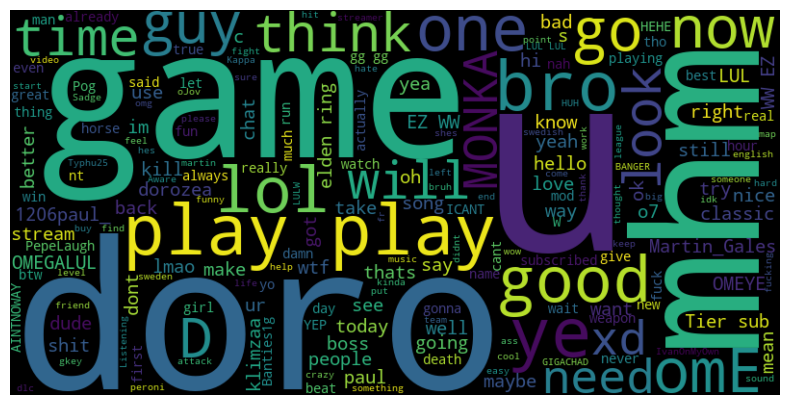

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
